### Dataset download and read
- source : https://archive.ics.uci.edu/ml/datasets/Online+Retail+II#

In [1]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx'

--2020-06-14 01:36:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45622278 (44M) [application/x-httpd-php]
Saving to: ‘online_retail_II.xlsx’

online_retail_II.xl 100%[===================>]  43.51M  15.8MB/s    in 2.8s    

2020-06-14 01:36:17 (15.8 MB/s) - ‘online_retail_II.xlsx’ saved [45622278/45622278]



In [2]:
import pandas as pd
from datetime import datetime
import  matplotlib.pyplot as plt 

In [3]:
online_retail = pd.read_excel('online_retail_II.xlsx')

In [4]:
online_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Dataset has 8 columns with following descriptions.
- **InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- **StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- **Description**: Product (item) name. Nominal.
- **Quantity**: The quantities of each product (item) per transaction. Numeric.
- **InvoiceDate**: Invice date and time. Numeric. The day and time when a transaction was generated.
- **UnitPrice**: Unit price. Numeric. Product price per unit in sterling (Â£).
- **CustomerID**: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- **Country**: Country name. Nominal. The name of the country where a customer resides.



In [5]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
Invoice        525461 non-null object
StockCode      525461 non-null object
Description    522533 non-null object
Quantity       525461 non-null int64
InvoiceDate    525461 non-null datetime64[ns]
Price          525461 non-null float64
Customer ID    417534 non-null float64
Country        525461 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


### Data cleansing

There are 106,429 records which don't have Customer ID. They look non-membership purchase. Just drop thease records to simplify the problem.

In [6]:
online_retail.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [7]:
online_retail[online_retail['Customer ID'].isnull()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [8]:
online_retail = online_retail[~online_retail['Customer ID'].isnull()]
online_retail.count()

Invoice        417534
StockCode      417534
Description    417534
Quantity       417534
InvoiceDate    417534
Price          417534
Customer ID    417534
Country        417534
dtype: int64

Daataset description is saying the canacelation transaction start with 'c' in Invoce number but there is no record starts with 'c' 

In [9]:
online_retail[online_retail['Invoice'].astype(str).str[0] == 'C'].count()

Invoice        9839
StockCode      9839
Description    9839
Quantity       9839
InvoiceDate    9839
Price          9839
Customer ID    9839
Country        9839
dtype: int64

In [10]:
online_retail[online_retail['Quantity'] < 0].tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom
525282,C538164,35004B,SET OF 3 BLACK FLYING DUCKS,-1,2010-12-09 17:32:00,1.95,14031.0,United Kingdom


In [11]:
online_retail[(online_retail['Customer ID'] == 14031) & (online_retail['StockCode'] == '35004B')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
95667,498431,35004B,SET OF 3 BLACK FLYING DUCKS,3,2010-02-18 17:29:00,5.45,14031.0,United Kingdom
122866,501132,35004B,SET OF 3 BLACK FLYING DUCKS,4,2010-03-12 17:07:00,5.45,14031.0,United Kingdom
180244,506453,35004B,SET OF 3 BLACK FLYING DUCKS,3,2010-04-29 18:34:00,5.45,14031.0,United Kingdom
203667,509029,35004B,SET OF 3 BLACK FLYING DUCKS,6,2010-05-19 15:24:00,5.45,14031.0,United Kingdom
216049,510363,35004B,SET OF 3 BLACK FLYING DUCKS,4,2010-05-28 16:31:00,5.45,14031.0,United Kingdom
239709,512559,35004B,SET OF 3 BLACK FLYING DUCKS,7,2010-06-16 14:26:00,5.45,14031.0,United Kingdom
267594,515301,35004B,SET OF 3 BLACK FLYING DUCKS,4,2010-07-09 15:31:00,5.45,14031.0,United Kingdom
279684,516615,35004B,SET OF 3 BLACK FLYING DUCKS,24,2010-07-21 15:05:00,4.65,14031.0,United Kingdom
290427,C517701,35004B,SET OF 3 BLACK FLYING DUCKS,-4,2010-07-30 17:08:00,4.65,14031.0,United Kingdom
319971,520568,35004B,SET OF 3 BLACK FLYING DUCKS,12,2010-08-26 18:32:00,4.65,14031.0,United Kingdom


- It is hard to find relationship between cancelations and original transactions. Just add new column to identify the cancelation 

In [12]:
online_retail['CancelYN'] = ['Y' if x == 'C' else 'N' for x in online_retail['Invoice'].astype(str).str[0]]

In [13]:
online_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CancelYN
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,N
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,N
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,N
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,N
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,N


In [14]:
online_retail[online_retail['Quantity'] < 0].tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CancelYN
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany,Y
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom,Y
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom,Y
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom,Y
525282,C538164,35004B,SET OF 3 BLACK FLYING DUCKS,-1,2010-12-09 17:32:00,1.95,14031.0,United Kingdom,Y


- Majority of the records are the sales in United Kingdom. We will use thease data

<BarContainer object of 15 artists>

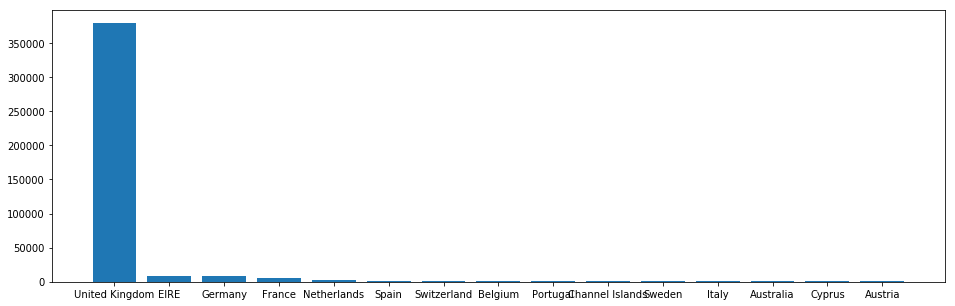

In [15]:
country_count = online_retail.groupby('Country').count().sort_values(['Invoice'],ascending=False)
plt.figure(figsize=(16,5))
plt.bar(country_count[:15].index, country_count[:15]['Invoice'])

In [16]:
online_retail = online_retail[online_retail['Country'] == 'United Kingdom'].drop(['Country'],axis=1)

In [17]:
online_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,CancelYN
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,N
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,N
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,N
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,N
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,N


- Generate the InvoiceDate and InvoiceDateTime columns

In [21]:
online_retail['InvoiceDateTime'] = online_retail['InvoiceDate']
online_retail['InvoiceDate'] = [datetime.date(i) for i in online_retail['InvoiceDateTime']]
online_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,CancelYN,InvoiceDateTime
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,N,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,N,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,N,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,N,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,N,2009-12-01 07:45:00


In [23]:
mindate = online_retail['InvoiceDate'].min()
maxdate = online_retail['InvoiceDate'].max()
print('Date ranges from {} to {}'.format(mindate, maxdate))

Date ranges from 2009-12-01 to 2010-12-09


- Choose the most sold item

In [43]:
online_retail.groupby(['StockCode']).sum().sort_values(['Quantity'],ascending=False).head()

,Quantity,Price,Customer ID
StockCode,,,
84077,51058,102.35,6968031.0
85123A,50663,8959.59,48989509.0
17003,47314,38.10,2961285.0
21212,44607,740.74,21239689.0
85099B,43728,3161.10,25588285.0


In [58]:
subset=online_retail[online_retail['StockCode'].astype(str).str.strip()=='84077'][['InvoiceDate','Quantity','CancelYN']].set_index('InvoiceDate')
subset.head()

,Quantity,CancelYN
InvoiceDate,,
2009-12-01,48,N
2009-12-02,288,N
2009-12-02,3,N
2009-12-02,48,N
2009-12-02,96,N


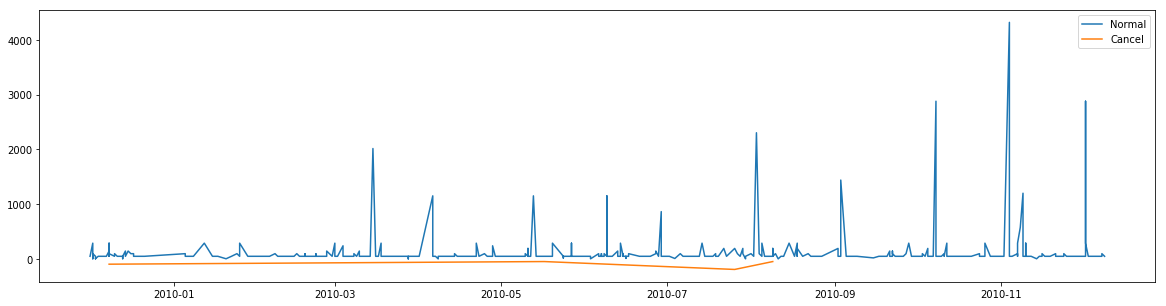

In [59]:
plt.figure(figsize=(20,5))
plt.plot(subset[subset['CancelYN']=='N']['Quantity'])
plt.plot(subset[subset['CancelYN']=='Y']['Quantity'])
plt.legend(['Normal','Cancel'])
plt.show()

- Choose the most frequently sold item

In [60]:
online_retail.groupby(['StockCode']).count().sort_values(['Invoice'],ascending=False).head()

,Invoice,Description,Quantity,InvoiceDate,Price,Customer ID,CancelYN,InvoiceDateTime
StockCode,,,,,,,,
85123A,3140,3140,3140,3140,3140,3140,3140,3140
22423,1672,1672,1672,1672,1672,1672,1672,1672
85099B,1658,1658,1658,1658,1658,1658,1658,1658
21232,1423,1423,1423,1423,1423,1423,1423,1423
21212,1379,1379,1379,1379,1379,1379,1379,1379


In [61]:
subset=online_retail[online_retail['StockCode'].astype(str).str.strip()=='85123A'][['InvoiceDate','Quantity','CancelYN']].set_index('InvoiceDate')
subset.head()

,Quantity,CancelYN
InvoiceDate,,
2009-12-01,6,N
2009-12-01,32,N
2009-12-01,64,N
2009-12-01,1,N
2009-12-01,32,N


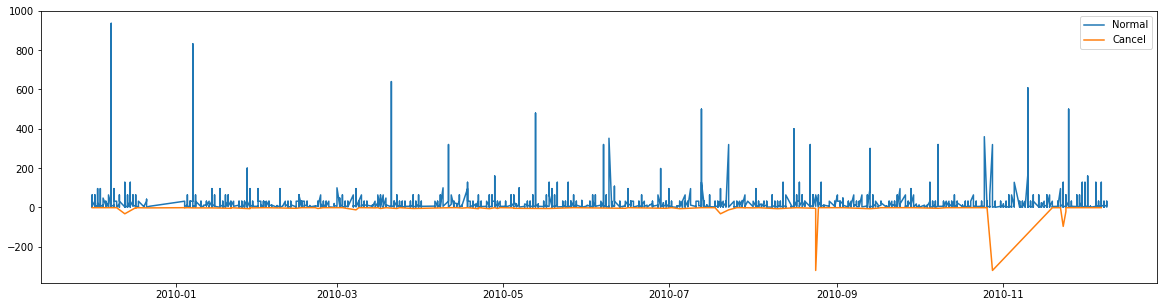

In [62]:
plt.figure(figsize=(20,5))
plt.plot(subset[subset['CancelYN']=='N']['Quantity'])
plt.plot(subset[subset['CancelYN']=='Y']['Quantity'])
plt.legend(['Normal','Cancel'])
plt.show()

- Count the order count

In [67]:
ordcnt = online_retail.groupby(['StockCode']).count().sort_values(['Invoice'],ascending=False)['Invoice']
ordcnt.head()

StockCode
85123A    3140
22423     1672
85099B    1658
21232     1423
21212     1379
Name: Invoice, dtype: int64

In [16]:
date_idx = pd.date_range(mindate,maxdate)

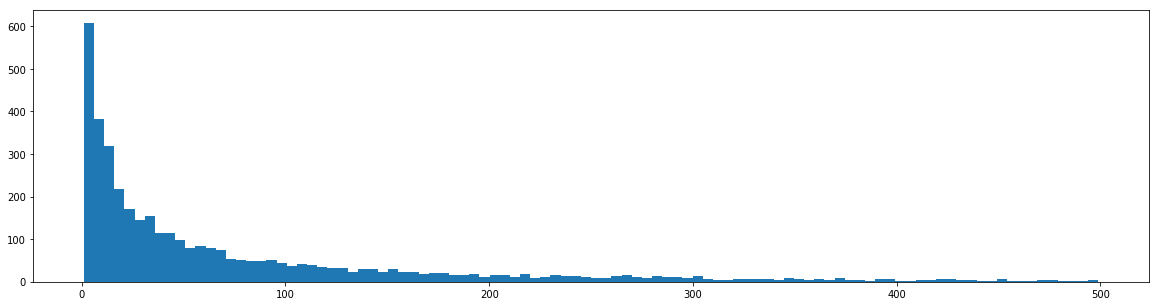

In [71]:
plt.figure(figsize=(20,5))
plt.hist(ordcnt[ordcnt.values<500], bins=100)
plt.show()

- Check the order count

In [78]:
print('There are {} items in the dataset'.format(ordcnt.count()))
print('{} items were sold less than 1000'.format(ordcnt[ordcnt[ordcnt.values<1000]].count()))
print('{} items were sold less than  500'.format(ordcnt[ordcnt[ordcnt.values< 500]].count()))
print('{} items were sold less than  100'.format(ordcnt[ordcnt[ordcnt.values< 100]].count()))
print('{} items were sold less than   50'.format(ordcnt[ordcnt[ordcnt.values<  50]].count()))
print('{} items were sold less than   10'.format(ordcnt[ordcnt[ordcnt.values<  10]].count()))

There are 4015 items in the dataset
4001 items were sold less than 1000
3907 items were sold less than  500
2932 items were sold less than  100
2300 items were sold less than   50
921 items were sold less than   10


- 